---
title: "Application of R for Finance - Assignment 1"
subtitle: "Data Analysis "
author: "Group 30"
date: "2025-09-27"
format: pdf
---
\newpage
\tableofcontents
\listoffigures
\listoftables
\newpage

# Setup

## Required libraries
Load the following libraries for data analysis and visualization.


In [1]:
library(dplyr)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Data Frame

Load the dataset **_compustat_food_bev.csv_** into a data frame.


This dataset contains company identifiers, trading information, and classification codes.

Table below summarises the main variables.

| Symbol  | Full Name                        | Description                                         |
|---------|----------------------------------|-----------------------------------------------------|
| GVKEY   | Global Company Key               | Unique number assigned to each company in Compustat |
| iid     | Issue Identifier                 | Code for specific security of a company             |
| datadate| Data Date                        | Date of the trading record.                         |
| tic     | Ticker Symbol                    | Stock ticker symbol of the company                  |
| conm    | Company Name                     | Official registered name of the company             |
| cshtrd  | Shares Traded                    | Number of shares traded during the day              |
| prccd   | Closing Price                    | Daily closing price of the security.                |
| prchd   | High Price                       | Daily highest trading price of the security         |
| prcld   | Low Price                        | Daily lowest trading price of the security          |
| prcod   | Opening Price                    | Daily opening price of the security                 |
| exchg   | Exchange Code                    | Code for stock exchange listing                     |
| sic     | Standard Industrial Classification | Code for primary business industry                  |

In [2]:
# load the data
data <- read.csv("compustat_food_bev.csv")

In [3]:
# inspect the strucutre
head(data)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,186785,1,01/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,813895,4.47,4.540,4.394,4.41,11,5812
2,186785,1,02/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,518021,4.48,4.522,4.400,4.49,11,5812
3,186785,1,03/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,947825,4.44,4.525,4.360,4.48,11,5812
4,186785,1,04/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,534286,4.41,4.490,4.280,4.48,11,5812
5,186785,1,08/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,669380,4.27,4.415,4.260,4.34,11,5812
6,186785,1,09/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,1152416,4.38,4.420,4.270,4.27,11,5812


# **Part 1 - Features**

## Indicators Definition

Key indicators used across companies are defined below.

* **Daily Return:**
The percentage change in the value from the previous day, reflecting daily profitability and price variation.
$$
return_{daily} = \frac{(close_t - close_{t-1})}{close_{t-1}}
$$

* **Overnight Return:**
The percentage change from the previous day’s close to the current day’s open, measuring price adjustments that occur outside of trading hours.
$$
return_{overnight} = \frac{(open_t - close_{t-1})}{close_{t-1}}
$$

* **10-Day Momentum Indicator:**
The difference between today's closing price and 10 days ago from the last closing price, tracking short-term trend strength.
$$
momentum_{10\text{-}day} = close_t - close_{t-10}
$$

* **Daily Range:**
The difference between the daily high and low prices,representing intraday volatility.
$$
range_{daily} = high_t - low_t
$$

* **Volume Change:**
The difference in trading volume compared to the previous day, showing Shows in trading activity.
$$
change_{volume} = volume_t - volume_{t-1}
$$

* **Close-Open Change:**
The difference between the daily closing price and the opening price, indicating intraday price direction.
$$
change_{close-open} = close_t - open_t
$$

* **Money Flow Volume Indicator (MFV):**
The flow of the money into and out of the security, estimating buying or selling pressure.
$$
MFV = \frac{((close_t - low_t) - (high_t - close_t))}{(high_t - low_t)} \times volume_t
$$


## Company Analysis

First, each company calculates a subset of four of the above measures, as specified in the assignment brief.

Next, additional features are derived from time-based information. After extracting the month and year from the trading date, indicator performance over specific periods is calculated and key dates associated with extreme values are identified.

### SBUX (Starbucks)

In [4]:
# subset SBUX
data_SBUX <- filter(data, tic == "SBUX")

# calculate indicators
data_SBUX$return_daily <- (data_SBUX$prccd - lag(data_SBUX$prccd, 1)) / lag(data_SBUX$prccd, 1)
data_SBUX$momentumn_10_day <- data_SBUX$prccd - lag(data_SBUX$prccd,10)
data_SBUX$range_daily <- data_SBUX$prchd - data_SBUX$prcld
data_SBUX$MFV <- ((data_SBUX$prccd - data_SBUX$prcld)-(data_SBUX$prchd - data_SBUX$prccd)/(data_SBUX$prchd-data_SBUX$prcld))*data_SBUX$cshtrd

# display results



In [5]:
# indicate month and year
data_SBUX$datadate <- as.Date(data_SBUX$datadate, format = '%d/%m/%Y')
data_SBUX$month <- month(data_SBUX$datadate)
data_SBUX$year <- year(data_SBUX$datadate)

In [6]:
# total trading volume in June 2023
total_trading_volume_SBUX <- sum(filter(data_SBUX,  month == 6 & year == 2023)$cshtrd)

# mean daily return over the entire period
mean_daily_return_SBUX <- mean(na.omit(data_SBUX$return_daily))

# date with the largest positive high price
date_largest_positive_high_price_SBUX <- data_SBUX$datadate[which.max(data_SBUX$prchd)]

# date with the largest positive daily return
date_largest_positive_return_SBUX <- data_SBUX$datadate[which.max(data_SBUX$return_daily)]

In [7]:
cat("The total trading volume for Starbucks in June 2023 is:", as.character(total_trading_volume_SBUX), "\n")
cat("The mean daily return for Starbucks is:", as.character(mean_daily_return_SBUX), "\n")
cat("The date with the largest positive high price for Starbucks is:", as.character(date_largest_positive_high_price_SBUX), "\n")
cat("The date with the largest positive return for Starbucks is:", as.character(date_largest_positive_return_SBUX), "\n")

The total trading volume for Starbucks in June 2023 is: 151045270 
The mean daily return for Starbucks is: 0.000291046723931376 
The date with the largest positive high price for Starbucks is: 2021-07-23 
The date with the largest positive return for Starbucks is: 2022-05-04 


### WEN (Wendy's)

In [8]:
# subset WEN
data_WEN <- filter(data, tic == "WEN")

# calculate indicators
data_WEN$return_daily <- (data_WEN$prccd - lag(data_WEN$prccd, 1)) / lag(data_WEN$prccd, 1)
data_WEN$return_overnight <- (data_WEN$prcod - lag(data_WEN$prccd, 1)) / lag(data_WEN$prccd, 1)
data_WEN$volume_change <- data_WEN$cshtrd - lag(data_WEN$cshtrd, 1)
data_WEN$MFV <- ((data_WEN$prccd - data_WEN$prcld)-(data_WEN$prchd - data_WEN$prccd)/(data_WEN$prchd-data_WEN$prcld))*data_WEN$cshtrd

# display results

In [9]:
# indicate month and year
data_WEN$datadate <- as.Date(data_WEN$datadate, format = '%d/%m/%Y')
data_WEN$month <- month(data_WEN$datadate)
data_WEN$year <- year(data_WEN$datadate)

In [10]:
# total trading volume in June 2023
total_trading_volume_WEN <- sum(filter(data_WEN,  month == 6 & year == 2023)$cshtrd)

# mean daily return over the entire period
mean_daily_return_WEN <- mean(na.omit(data_WEN$return_daily))

# date with the largest positive high price
date_largest_positive_high_price_WEN <- data_WEN$datadate[which.max(data_WEN$prchd)]

# date with the largest positive daily return
date_largest_positive_return_WEN <- data_WEN$datadate[which.max(data_WEN$return_daily)]

In [11]:
cat("The total trading volume for Wendy's in June 2023 is:", as.character(total_trading_volume_WEN), "\n")
cat("The mean daily return for Wendy's is:", as.character(mean_daily_return_WEN), "\n")
cat("The date with the largest positive high price for Wendy's is:", as.character(date_largest_positive_high_price_WEN), "\n")
cat("The date with the largest positive return for Wendy's is:", as.character(date_largest_positive_return_WEN), "\n")

The total trading volume for Wendy's in June 2023 is: 54557454 
The mean daily return for Wendy's is: 0.000116474712706267 
The date with the largest positive high price for Wendy's is: 2021-06-08 
The date with the largest positive return for Wendy's is: 2021-06-08 


### PBPB (Potbelly)

In [12]:
# subset PBPB
data_PBPB <- filter(data, tic == "PBPB")

# calculate indicators
data_PBPB$return_daily <- (data_PBPB$prccd - lag(data_PBPB$prccd, 1)) / lag(data_PBPB$prccd, 1)
data_PBPB$return_overnight <- (data_PBPB$prcod - lag(data_PBPB$prccd, 1)) / lag(data_PBPB$prccd, 1)
data_PBPB$change_close_open <- data_PBPB$prccd - data_PBPB$prcod
data_PBPB$MFV <- ((data_PBPB$prccd - data_PBPB$prcld)-(data_PBPB$prchd - data_PBPB$prccd)/(data_PBPB$prchd-data_PBPB$prcld))*data_PBPB$cshtrd

# display results

In [13]:
# indicate month and year
data_PBPB$datadate <- as.Date(data_PBPB$datadate, format = '%d/%m/%Y')
data_PBPB$month <- month(data_PBPB$datadate)
data_PBPB$year <- year(data_PBPB$datadate)

In [14]:
# total trading volume in June 2023
total_trading_volume_PBPB <- sum(filter(data_PBPB,  month == 6 & year == 2023)$cshtrd)

# mean daily return over the entire period
mean_daily_return_PBPB <- mean(na.omit(data_PBPB$return_daily))

# date with the largest positive high price
date_largest_positive_high_price_PBPB <- data_PBPB$datadate[which.max(data_PBPB$prchd)]

# date with the largest positive daily return
date_largest_positive_return_PBPB <- data_PBPB$datadate[which.max(data_PBPB$return_daily)]

In [15]:
cat("The total trading volume for Potbelly in June 2023 is:", as.character(total_trading_volume_PBPB), "\n")
cat("The mean daily return for Potbelly is:", as.character(mean_daily_return_PBPB), "\n")
cat("The date with the largest positive high price for Potbelly is:", as.character(date_largest_positive_high_price_PBPB), "\n")
cat("The date with the largest positive return for Potbelly is:", as.character(date_largest_positive_return_PBPB), "\n")

The total trading volume for Potbelly in June 2023 is: 6780601 
The mean daily return for Potbelly is: 0.00127986776777774 
The date with the largest positive high price for Potbelly is: 2023-04-26 
The date with the largest positive return for Potbelly is: 2021-03-15 


### DPZ (Domino's Pizza)

In [16]:
# subset PBPB
data_DPZ <- filter(data, tic == "DPZ")

# calculate indicators
data_DPZ$return_daily <- (data_DPZ$prccd - lag(data_DPZ$prccd, 1)) / lag(data_DPZ$prccd, 1)
data_DPZ$return_overnight <- (data_DPZ$prcod - lag(data_DPZ$prccd, 1)) / lag(data_DPZ$prccd, 1)
data_DPZ$change_close_open <- data_DPZ$prccd - data_DPZ$prcod
data_DPZ$MFV <- ((data_DPZ$prccd - data_DPZ$prcld)-(data_DPZ$prchd - data_DPZ$prccd)/(data_DPZ$prchd-data_DPZ$prcld))*data_DPZ$cshtrd

# display results

In [17]:
# indicate month and year
data_DPZ$datadate <- as.Date(data_DPZ$datadate, format = '%d/%m/%Y')
data_DPZ$month <- month(data_DPZ$datadate)
data_DPZ$year <- year(data_DPZ$datadate)

In [18]:
# total trading volume in June 2023
total_trading_volume_DPZ <- sum(filter(data_DPZ,  month == 6 & year == 2023)$cshtrd)

# mean daily return over the entire period
mean_daily_return_DPZ <- mean(na.omit(data_DPZ$return_daily))

# date with the largest positive high price
date_largest_positive_high_price_DPZ <- data_DPZ$datadate[which.max(data_DPZ$prchd)]

# date with the largest positive daily return
date_largest_positive_return_DPZ <- data_DPZ$datadate[which.max(data_DPZ$return_daily)]

In [19]:
cat("The total trading volume for Domino's Pizza in June 2023 is:", as.character(total_trading_volume_DPZ), "\n")
cat("The mean daily return for Domino's Pizza is:", as.character(mean_daily_return_DPZ), "\n")
cat("The date with the largest positive high price for Domino's Pizza is:", as.character(date_largest_positive_high_price_DPZ), "\n")
cat("The date with the largest positive return for Domino's Pizza is:", as.character(date_largest_positive_return_DPZ), "\n")

The total trading volume for Domino's Pizza in June 2023 is: 13772765 
The mean daily return for Domino's Pizza is: 0.000131279516490993 
The date with the largest positive high price for Domino's Pizza is: 2021-12-31 
The date with the largest positive return for Domino's Pizza is: 2021-07-22 


### Part 2 - Results

In [41]:
# generate dataframe of number of stocks with daily trading volume > 100,000 in each exchange
filtered_stocks_volume <- select(filter(data, cshtrd > 100000), tic, datadate, exchg)
filtered_stocks_volume.groupby <- group_by(filtered_stocks_volume, exchg)
result <- summarise(filtered_stocks_volume.groupby, num_stocks = n_distinct(tic))

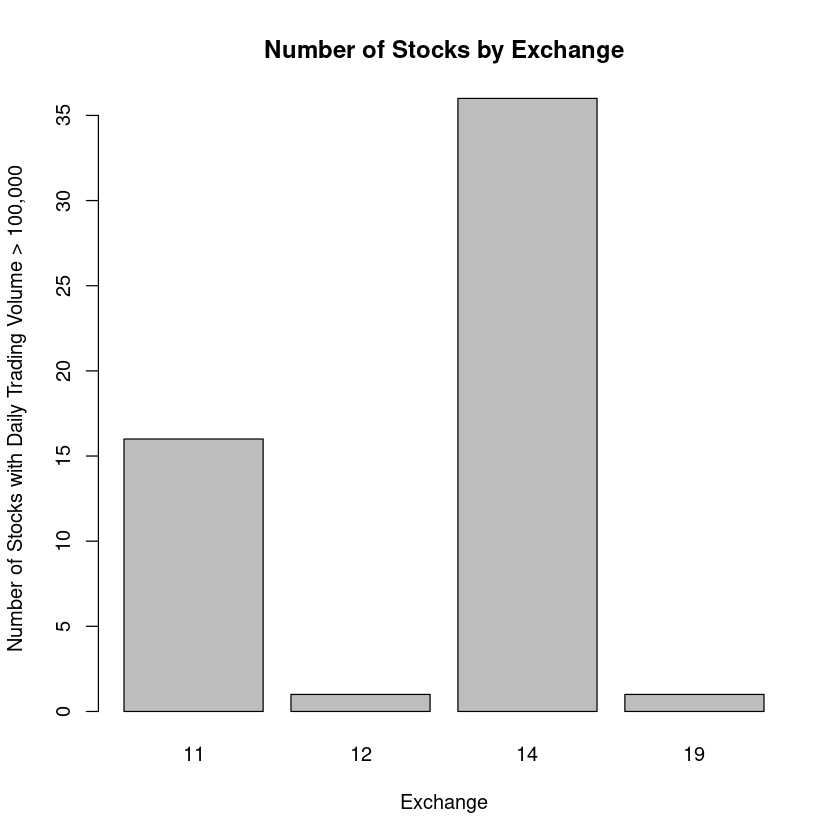

In [42]:
# visualize the result using bar plot
barplot(result$num_stocks, names.arg = result$exchg, xlab = "Exchange", ylab = "Number of Stocks with Daily Trading Volume > 100,000", main = "Number of Stocks by Exchange")

In [43]:
# filter stocks mentioned in part 1 with daily trading volume > 100,000
filtered_stocks <- filter(data, tic %in% c("SBUX", "WEN", "PBPB", "DPZ"))

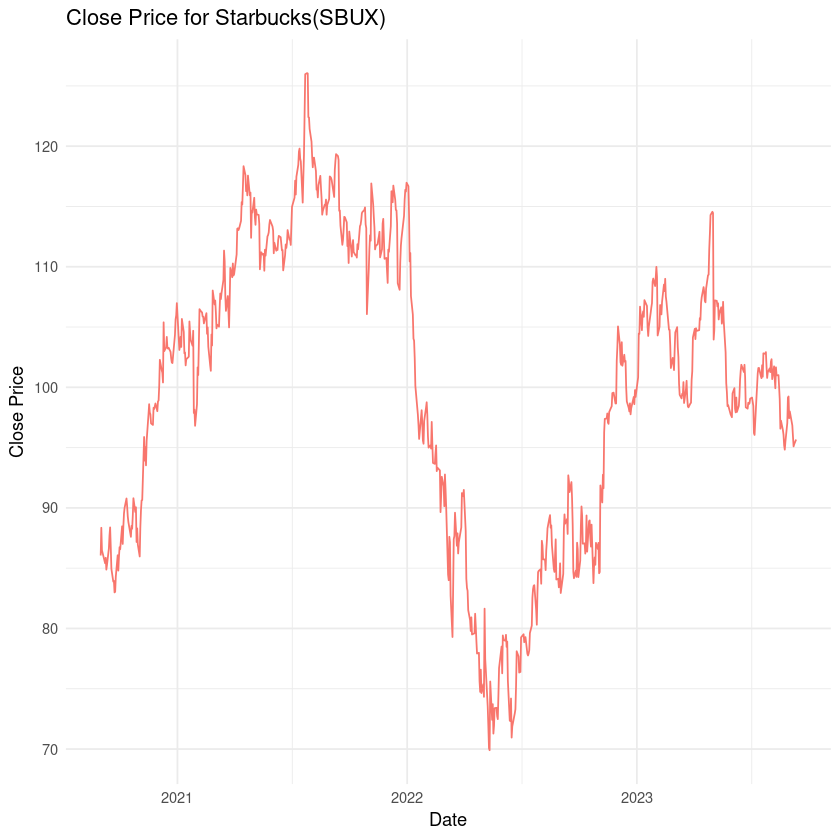

In [ ]:
# plot one line plot of close price over time for SBUX
library(ggplot2)
ggplot(data_SBUX, aes(x = as.Date(datadate, format = '%d/%m/%Y'), y = prccd, color = tic)) +
  geom_line() +
  labs(title = "Close Price for Starbucks(SBUX)", legend.position = c(0.5, 1), x = "Date", y = "Close Price") +
  theme_minimal() +
  theme(legend.position = "topcenter")

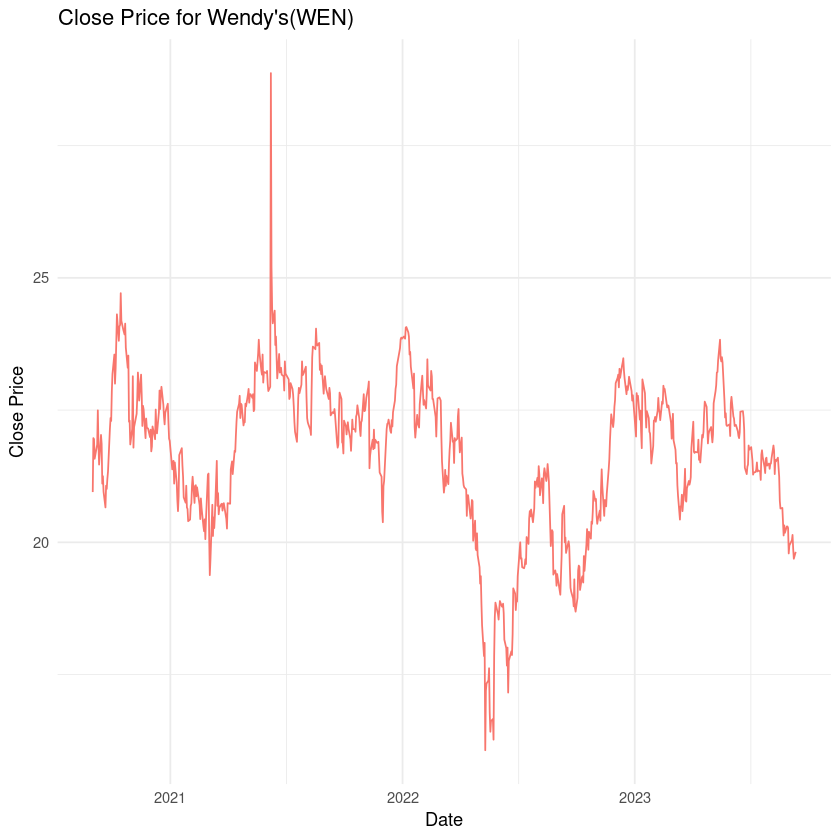

In [54]:
# plot one line plot of close price over time for WEN
library(ggplot2)
ggplot(data_WEN, aes(x = as.Date(datadate, format = '%d/%m/%Y'), y = prccd, color = tic)) +
  geom_line() +
  labs(title = "Close Price for Wendy's(WEN)", legend.position = c(0.5, 1), x = "Date", y = "Close Price") +
  theme_minimal() +
  theme(legend.position = "topcenter")

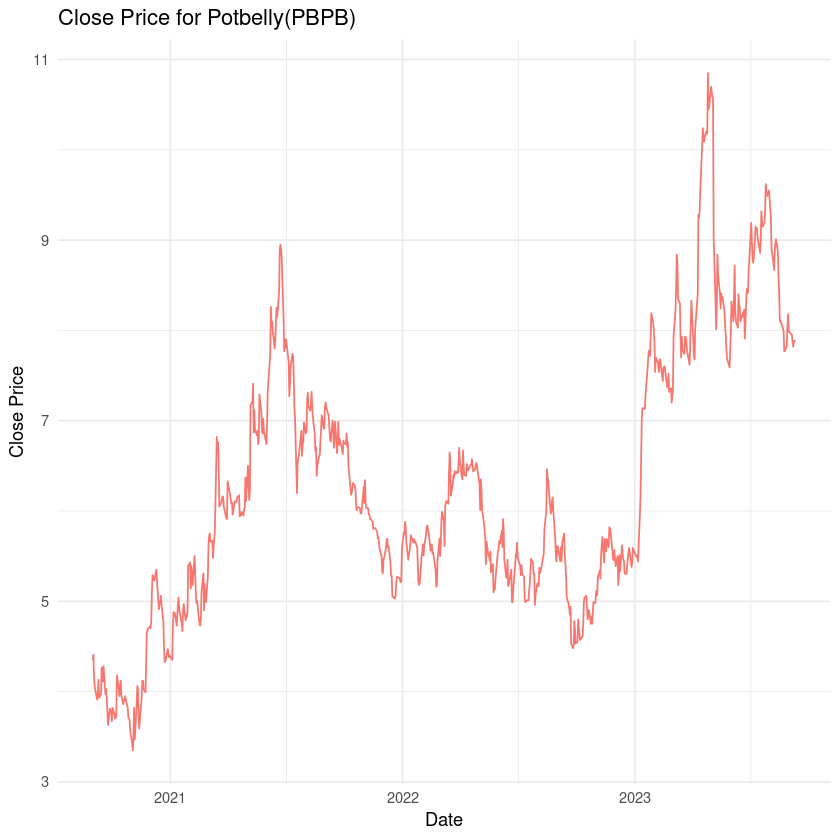

In [55]:
# plot one line plot of close price over time for PBPB
library(ggplot2)
ggplot(data_PBPB, aes(x = as.Date(datadate, format = '%d/%m/%Y'), y = prccd, color = tic)) +
  geom_line() +
  labs(title = "Close Price for Potbelly(PBPB)", legend.position = c(0.5, 1), x = "Date", y = "Close Price") +
  theme_minimal() +
  theme(legend.position = "topcenter")

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


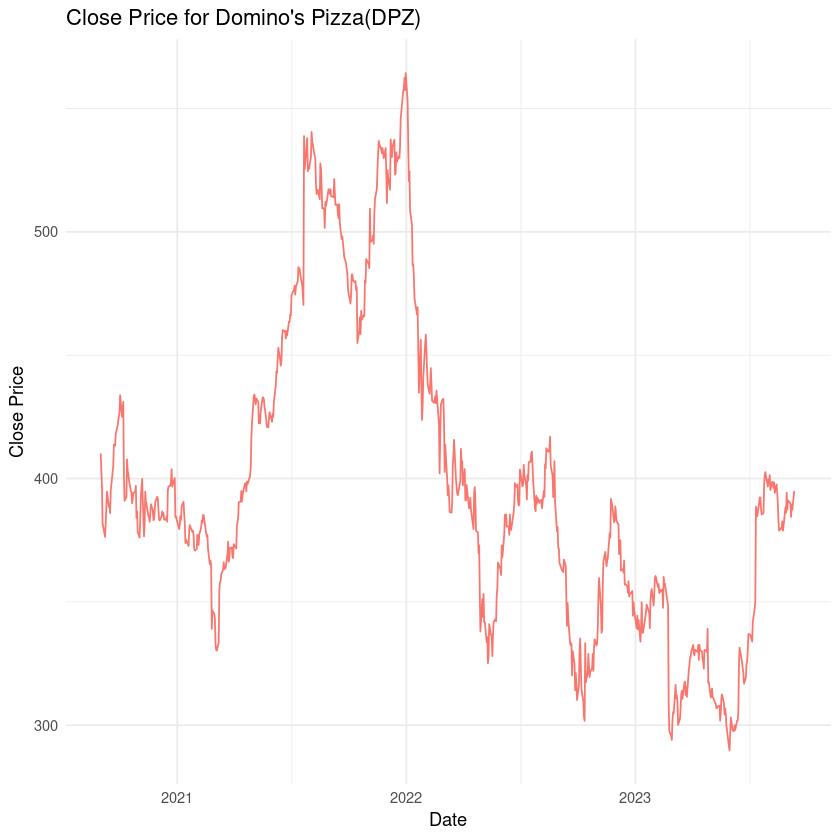

In [56]:
# plot one line plot of close price over time for DPZ
library(ggplot2)
ggplot(data_DPZ, aes(x = as.Date(datadate, format = '%d/%m/%Y'), y = prccd, color = tic)) +
  geom_line() +
  labs(title = "Close Price for Domino's Pizza(DPZ)", legend.position = c(0.5, 1), x = "Date", y = "Close Price") +
  theme_minimal() +
  theme(legend.position = "topcenter")

## Summary

In [58]:
# determine which stock in SBUX, WEN, PBPB, DPZ has the highest mean daily return over the entire period
mean_returns <- c(mean_daily_return_SBUX, mean_daily_return_WEN, mean_daily_return_PBPB, mean_daily_return_DPZ)
names(mean_returns) <- c("SBUX", "WEN", "PBPB", "DPZ")
highest_mean_return_stock <- names(which.max(mean_returns))
cat("The stock with the highest mean daily return is:", highest_mean_return_stock, "with a mean daily return of", mean_returns[highest_mean_return_stock], "\n")

The stock with the highest mean daily return is: PBPB with a mean daily return of 0.001279868 


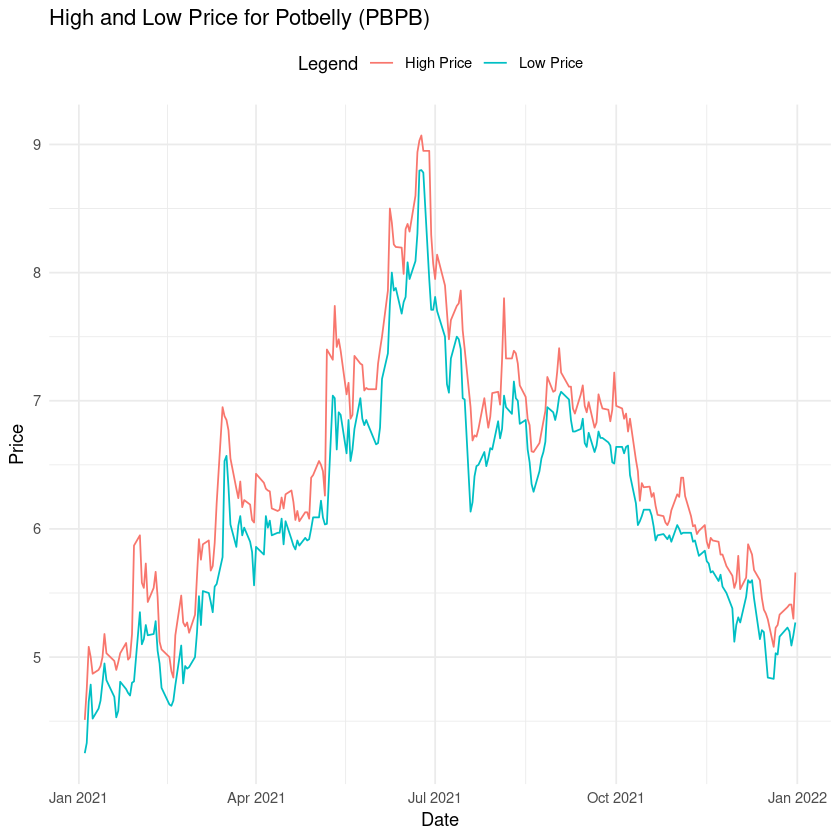

In [61]:
# plot one line plot of high and low price in 2021 for PBPB
ggplot(filter(data_PBPB, year == 2021), aes(x = as.Date(datadate, format = '%d/%m/%Y'))) +
    geom_line(aes(y = prchd, color = "High Price")) +
    geom_line(aes(y = prcld, color = "Low Price")) +
    labs(title = "High and Low Price for Potbelly (PBPB)", x = "Date", y = "Price", color = "Legend") +
    theme_minimal() +
    theme(legend.position = "top")


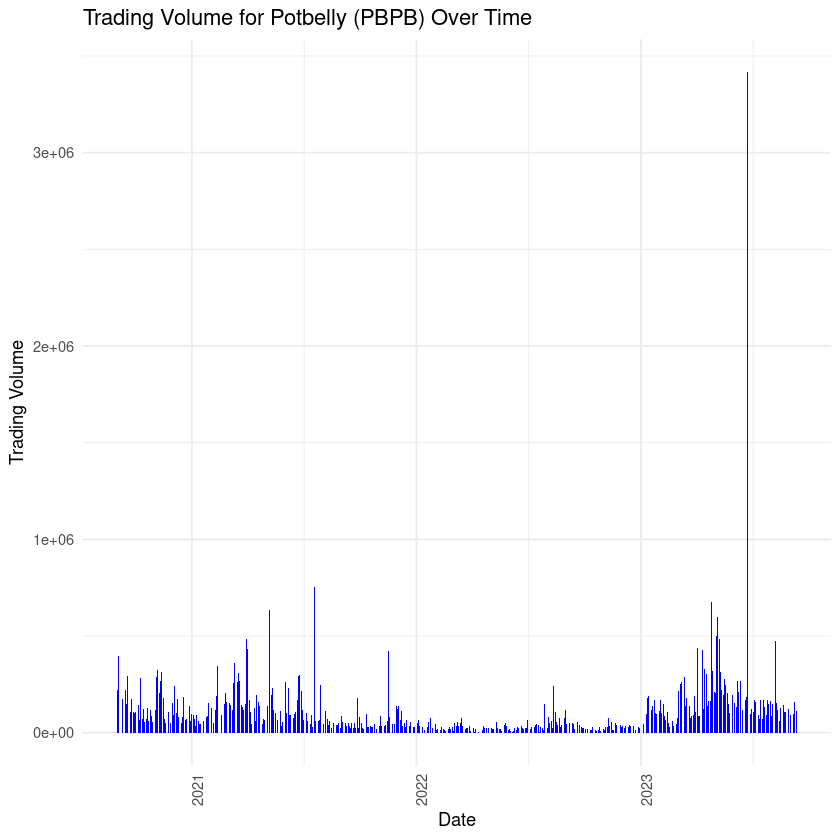

In [64]:
# create bar plot of trading volume for PBPB throughout the entire period
ggplot(data_PBPB, aes(x = as.Date(datadate, format = '%d/%m/%Y'), y = cshtrd)) +
    geom_bar(stat = "identity", fill = "blue") +
    labs(title = "Trading Volume for Potbelly (PBPB) Over Time", x = "Date", y = "Trading Volume") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

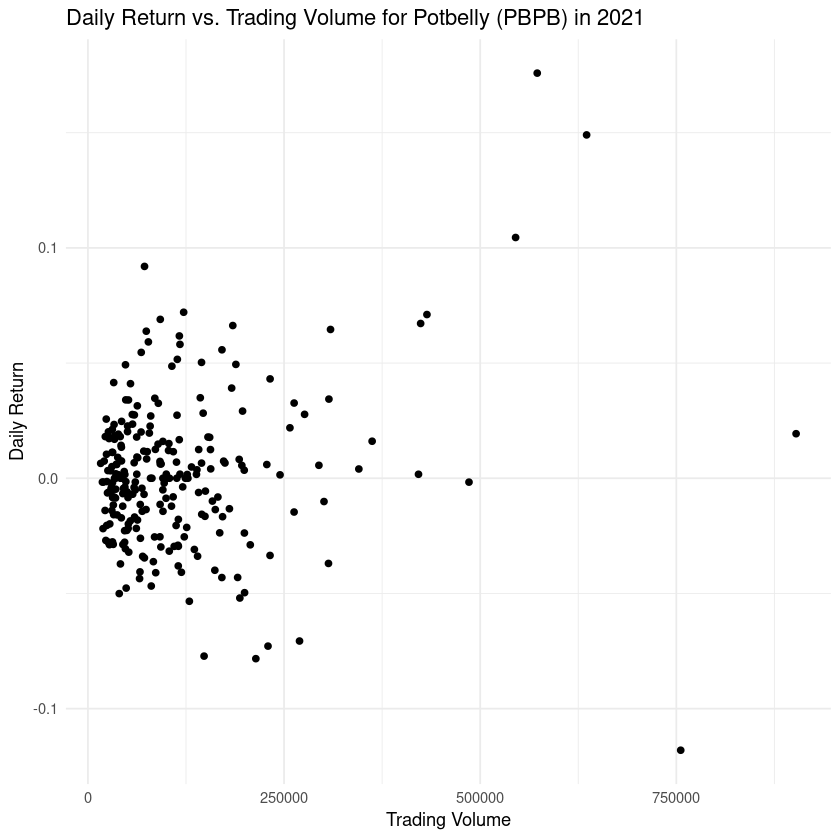

In [67]:
# create scatter plot of daily return vs. trading volume for PBPB in 2021
ggplot(filter(data_PBPB, year == 2021), aes(x = cshtrd, y = return_daily)) +
    geom_point() +
    labs(title = "Daily Return vs. Trading Volume for Potbelly (PBPB) in 2021", x = "Trading Volume", y = "Daily Return") +
    theme_minimal()